In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

### 2. Tiempo libre medio

(a) Descargue los datos:

In [2]:
!wget https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EnergiaPotencialGas2D.txt

--2022-02-14 16:47:18--  https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EnergiaPotencialGas2D.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400000 (391K) [text/plain]
Saving to: ‘EnergiaPotencialGas2D.txt.3’

EnergiaPotencialGas 100%[===================>] 390.62K  --.-KB/s    in 0.03s   

2022-02-14 16:47:18 (11.0 MB/s) - ‘EnergiaPotencialGas2D.txt.3’ saved [400000/400000]



In [3]:
E = []
t = []

with open('EnergiaPotencialGas2D.txt', 'r') as data:
  csv_reader = csv.reader(data, delimiter=' ')

  for line in csv_reader:
    t.append(float(line[0]))
    E.append(float(line[1]))

E = np.array(E)
t = np.array(t)

In [4]:
sampleT = t[1] - t[0]

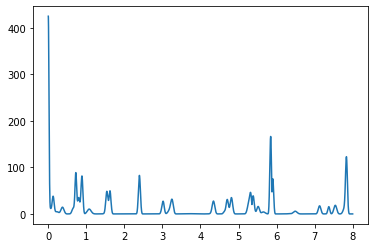

In [5]:
plt.plot(t,E)
plt.show()

(b) Quitar el valor medio de la energía potencial.

In [6]:
E_m = E - np.mean(E)

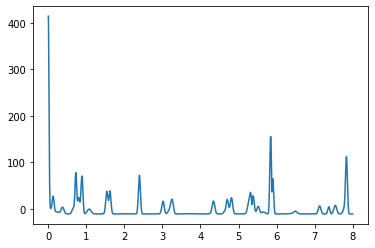

In [7]:
plt.plot(t,E_m)
plt.show()

(c) Encuentre la transformada rápida de Fourier de los datos.

In [8]:
X = np.fft.fft(E_m)
freqs = np.fft.fftfreq(len(t))

In [9]:
X_a = np.abs(X)

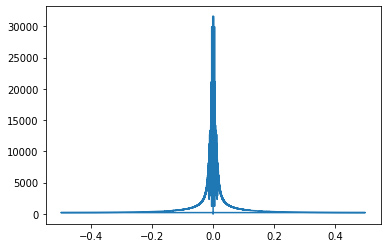

In [10]:
plt.plot(freqs,X_a)
plt.show()

(d) Encuentre la frecuencia fundamental asociada a la frecuencia media de colisión entre partículas.

In [11]:
mask = freqs < 0
X[mask] = 0
X_a[mask] = 0

In [12]:
ii = np.argmax(X_a)
mask = X_a < X_a[ii]
X[mask] = 0

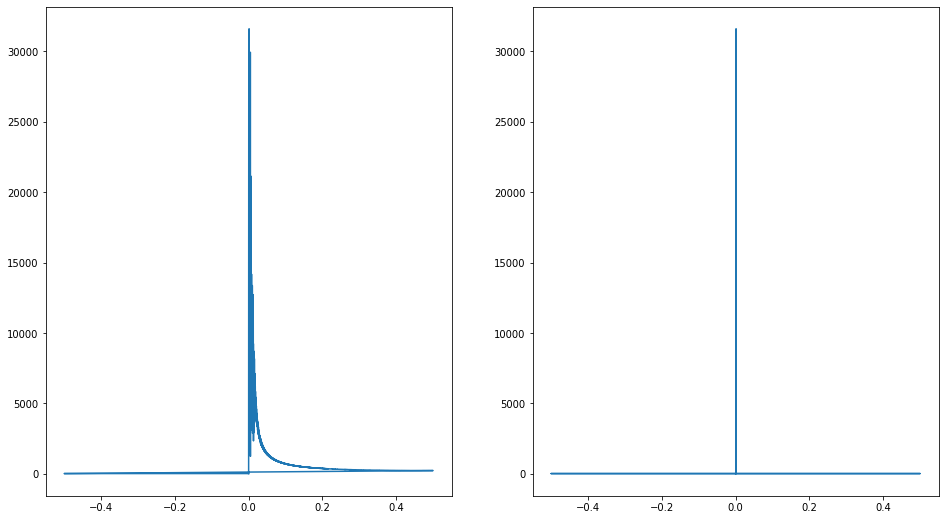

In [13]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.plot(freqs,X_a)

plt.subplot(1,2,2)
plt.plot(freqs,np.abs(X))
plt.show()

In [14]:
f0 = freqs[ii]
print(r'La frecuencia fundamental asociada a la frecuencia media de colisión es {:.4f} s^-1.'.format(f0/sampleT))

La frecuencia fundamental asociada a la frecuencia media de colisión es 1.2500 s^-1.


(e) Encuentre $\tau$ como $\tau = 1/f_0$ en pasos temporales.

In [15]:
print('El tiempo libre medio es {:.2f} pasos temporales.'.format(1/f0))

El tiempo libre medio es 800.00 pasos temporales.


(f) Obtenga la figura derecha.

In [16]:
fundamental = np.fft.ifft(X)

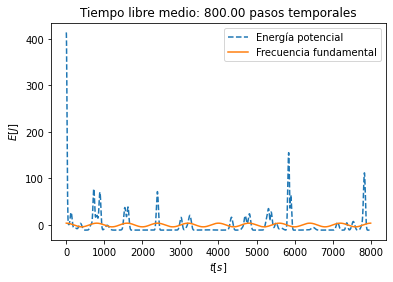

In [17]:
plt.plot(E_m, '--', label='Energía potencial')
plt.plot(np.real(fundamental), label='Frecuencia fundamental')
plt.xlabel(r'$t[s]$')
plt.ylabel(r'$E[J]$')
plt.title('Tiempo libre medio: {:.2f} pasos temporales'.format(1/f0))
plt.legend()
plt.show()